In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
from fastai.basic_train import Learner
from ner_data import DEV, TEST, TRAIN, get_data_bunch
from optimizer import BertAdam
from learner import BertForNER, ner_loss

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


## Get Data

download the conll-2003 dataset
for example from https://github.com/Nidhi-K/Natural-Language-Processing-Projects/tree/master/Sequential%20CRF%20for%20NER/data
</br>(note: english test set is blind)
Full english dataset: https://github.com/kyzhouhzau/BERT-NER/tree/master/NERdata

and save it to DATA_PATH

In [3]:
DATA_PATH = Path('./data/conll-2003/eng')
DATA_PATH.mkdir(parents=True, exist_ok=True)

CSV_PATH = Path('./data/conll-2003/csv')
CSV_PATH.mkdir(parents=True, exist_ok=True)

DATA_BUNCH_PATH = Path('./data/conll-2003/data_bunch')
DATA_BUNCH_PATH.mkdir(parents=True, exist_ok=True)

ENG = {
    TRAIN: 'train.txt',
    DEV: 'dev.txt',
    TEST: 'test.txt'
}


In [4]:
# ! svn co 'https://github.com/Nidhi-K/Natural-Language-Processing-Projects/trunk/Sequential CRF for NER/data/' {DATA_PATH}
# ! svn co 'https://github.com/kyzhouhzau/BERT-NER/trunk/NERdata/' {DATA_PATH} 

In [5]:
# x = [DATA_PATH/file for file in [TRAIN, DEV, TEST]]
# conll_to_csv(CSV_PATH,x)

In [6]:
data = get_data_bunch(DATA_BUNCH_PATH, ENG, batch_size=1)

100%|██████████| 10/10 [00:00<00:00, 1265.98it/s]


{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, 'O': 3, 'B-PER': 4, 'I-PER': 5, 'B-ORG': 6, 'I-ORG': 7, 'B-LOC': 8, 'I-LOC': 9, 'B-MISC': 10, 'I-MISC': 11}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, 'O': 3, 'B-PER': 4, 'I-PER': 5, 'B-ORG': 6, 'I-ORG': 7, 'B-LOC': 8, 'I-LOC': 9, 'B-MISC': 10, 'I-MISC': 11}


100%|██████████| 10/10 [00:00<00:00, 1682.16it/s]


{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, 'O': 3, 'B-PER': 4, 'I-PER': 5, 'B-ORG': 6, 'I-ORG': 7, 'B-LOC': 8, 'I-LOC': 9, 'B-MISC': 10, 'I-MISC': 11}
50
10
10


In [7]:
data.batch_size

1

In [8]:
model = BertForNER.from_pretrained('bert-base-uncased', num_labels=12)

In [10]:
learn = Learner(data, model, BertAdam, loss_func=ner_loss)

In [11]:
learn.lr_find()

PicklingError: Can't pickle <function ner_loss at 0x7f05f38ae378>: it's not the same object as learner.ner_loss

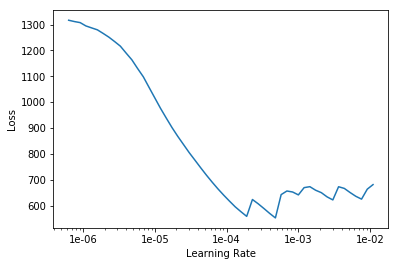

In [12]:
learn.recorder.plot(skip_end=15)

In [13]:
learn.fit(1,0.003)

epoch,train_loss,valid_loss,time
1,nan,nan,04:35


In [14]:
learn.fit(1,1e-05)

epoch,train_loss,valid_loss,time
1,nan,nan,04:13
